# Import Required Libraries 

In [51]:
!pip install matplotlib
!pip install statsmodels

In [52]:
from pathlib import Path

from dateutil.parser import parse 
from matplotlib.pyplot import cm
from plotly.subplots import make_subplots
from scipy import signal
from sklearn.linear_model import LinearRegression
from pandas.api.indexers import BaseIndexer
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.api import OLS

import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.graph_objects as go

import os
import warnings 
import datetime


import warnings
warnings.filterwarnings('ignore')

# Loading Data and other details

In [53]:
csvs = Path("/home/dmacs/Documents/Pranav_Phanindra/Data_Scraping_Final/Data_Part_2/Collated/CSVs")

#Directory containing all the files
DataFiles = os.listdir(csvs)

CropData = pd.read_csv(csvs / '12_Mustard.csv' , parse_dates = ['Price Date'])
CropData = CropData.iloc[:,1:]

CropData['Price Date'] =  pd.to_datetime(CropData['Price Date'])

CropData['Yr-mon'] = CropData['Price Date'].dt.strftime('%Y%m')
CropData['Yr-mon'] = pd.to_datetime(CropData['Yr-mon'], format = '%Y%m')

CropData['Year'] = CropData.set_index('Yr-mon').index.year
CropData['Month'] = CropData.set_index('Yr-mon').index.month

CropData.set_index('Price Date')

District Name  Market Name Commodity   Variety    Grade  \
Price Date                                                           
2009-02-20      Kurnool        Adoni   Mustard     Other      FAQ    
2013-05-03      Kurnool         Alur   Mustard     Other   Medium    
2013-03-25      Kurnool         Alur   Mustard   Mustard   Medium    
2013-03-25      Kurnool         Alur   Mustard     Other   Medium    
2012-04-22      Kurnool         Alur   Mustard   Mustard   Medium    
...                  ...          ...       ...       ...      ...   
2016-06-05   Coochbehar   Toofanganj   Mustard   Mustard      FAQ    
2016-06-04   Coochbehar   Toofanganj   Mustard   Mustard      FAQ    
2016-06-03   Coochbehar   Toofanganj   Mustard   Mustard      FAQ    
2016-06-02   Coochbehar   Toofanganj   Mustard   Mustard      FAQ    
2016-06-01   Coochbehar   Toofanganj   Mustard   Mustard      FAQ    

            Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
Price Date                                                     
2009-02-20            1550.00000000            1600.00000000   
2013-05-03            2918.00000000            2918.00000000   
2013-03-25            3018.00000000            3018.00000000   
2013-03-25            3018.00000000            3018.00000000   
2012-04-22            2598.00000000            2598.00000000   
...                             ...                      ...   
2016-06-05            4300.00000000            4500.00000000   
2016-06-04            4300.00000000            4500.00000000   
2016-06-03            4300.00000000            4500.00000000   
2016-06-02            4300.00000000            4500.00000000   
2016-06-01            4300.00000000            4500.00000000   

            Modal Price (Rs./Quintal)           State     Yr-mon  Year  Month  
Price Date                                                                     
2009-02-20              1575.00000000  Andhra Pradesh 2009-02-01  2009      2  
2013-05-03              2918.00000000  Andhra Pradesh 2013-05-01  2013      5  
2013-03-25              3018.00000000  Andhra Pradesh 2013-03-01  2013      3  
2013-03-25              3018.00000000  Andhra Pradesh 2013-03-01  2013      3  
2012-04-22              2598.00000000  Andhra Pradesh 2012-04-01  2012      4  
...                               ...             ...        ...   ...    ...  
2016-06-05              4400.00000000     West Bengal 2016-06-01  2016      6  
2016-06-04              4400.00000000     West Bengal 2016-06-01  2016      6  
2016-06-03              4400.00000000     West Bengal 2016-06-01  2016      6  
2016-06-02              4400.00000000     West Bengal 2016-06-01  2016      6  
2016-06-01              4400.00000000     West Bengal 2016-06-01  2016      6  

[1014648 rows x 12 columns]

In [54]:
CropData_Summarized = CropData.groupby(['Yr-mon'],as_index = False).mean()

"""
import datetime
mydate = datetime.datetime.now()
mydate.strftime("%B")

CropData_Summarized['Month_name'] =  CropData_Summarized.set_index('Yr-mon').index.strftime('%B')
"""




years = CropData_Summarized['Year'].unique()


month = CropData_Summarized['Month'].unique()

print(years)
print(month)


[2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.
 2020. 2021. 2022.]
[ 4.  5.  6.  7.  8.  9. 10. 11. 12.  1.  2.  3.]


### Plotting The Data

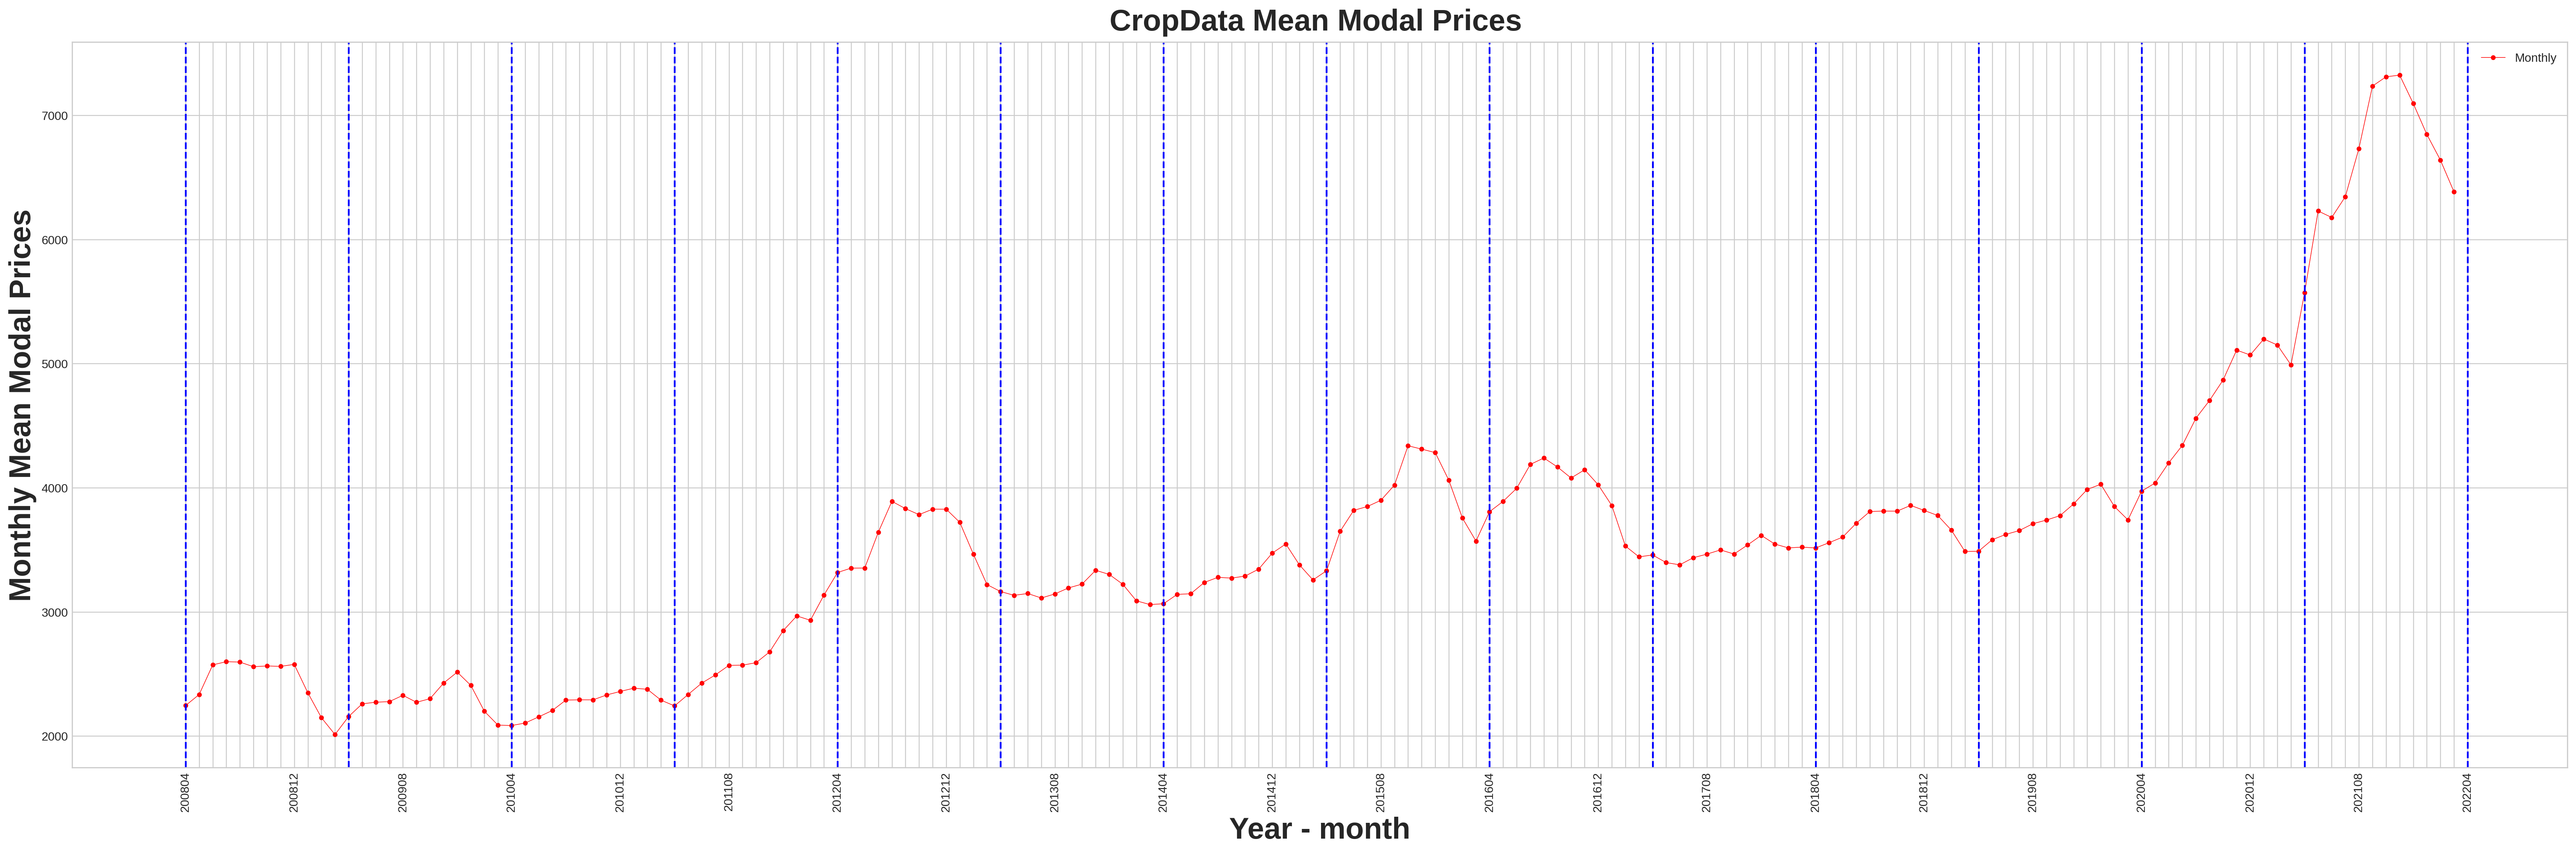

In [55]:
fig , ax = plt.subplots(figsize =  (30 , 10))
ax.plot(
    CropData_Summarized['Yr-mon'].dt.strftime('%Y%m'),
    CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] ,
    marker = '.' , 
    linestyle = '-',
    linewidth = '0.5',
    label = 'Monthly',
    color = 'r'
)

plt.xlabel('Year - month', fontsize = 25)
plt.ylabel('Monthly Mean Modal Prices', fontsize = 25)
plt.title("CropData Mean Modal Prices " , fontsize = 25)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.locator_params(axis='x', nbins=10)
ax.autoscale()

"""
For setting no of labels in xaxis 
ax.xaxis.set_major_locator(plt.MaxNLocator(50))
"""

#Division for each financial year

xcoords = ['{}04'.format(i) for i in range(2008,2023)]
for xc in xcoords:
    plt.axvline(x=xc, color='b', linestyle='--')
    
    
every_nth = 8
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


        
ax.legend()

### Analysis 

#### Additive Decomposition

###### Y[t] = T[t] + S[t] + e[t]

     Y[t]: Our time-series function
     T[t]: Trend (general tendency to move up or down)
     S[t]: Seasonality (cyclic pattern occurring at regular intervals)
     e[t]: Residual (random noise in the data that isn’t accounted for in the trend or seasonality

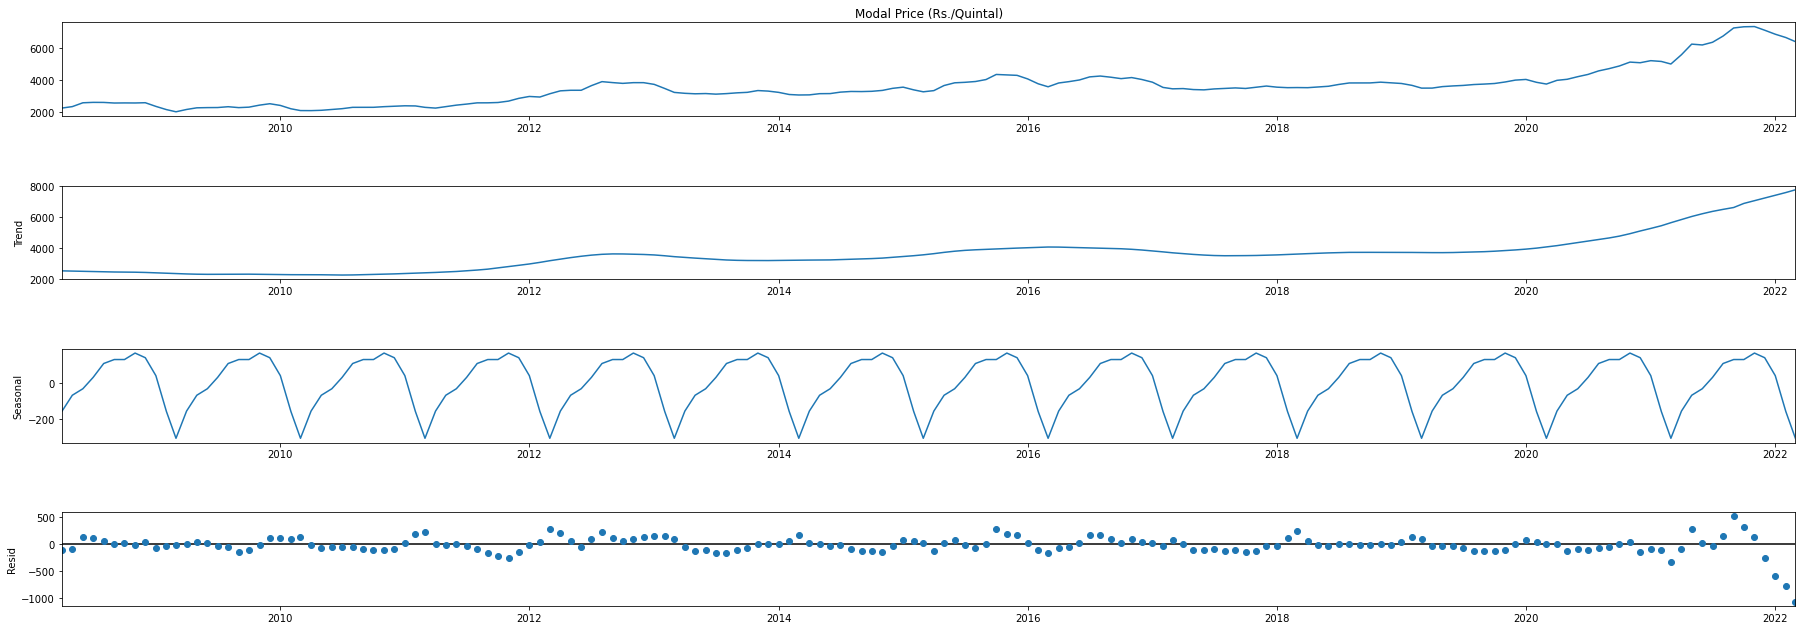

In [6]:
def seasonal_decompose_add(y):
     decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
     fig = decomposition.plot()
     fig.set_size_inches(30,10)
     plt.show()

seasonal_decompose_add(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'])

#### Multiplicative

##### Y[t] = T[t] *S[t] *e[t]

##### The amplitude of our seasonality becomes larger or smaller based on the trend. 

        

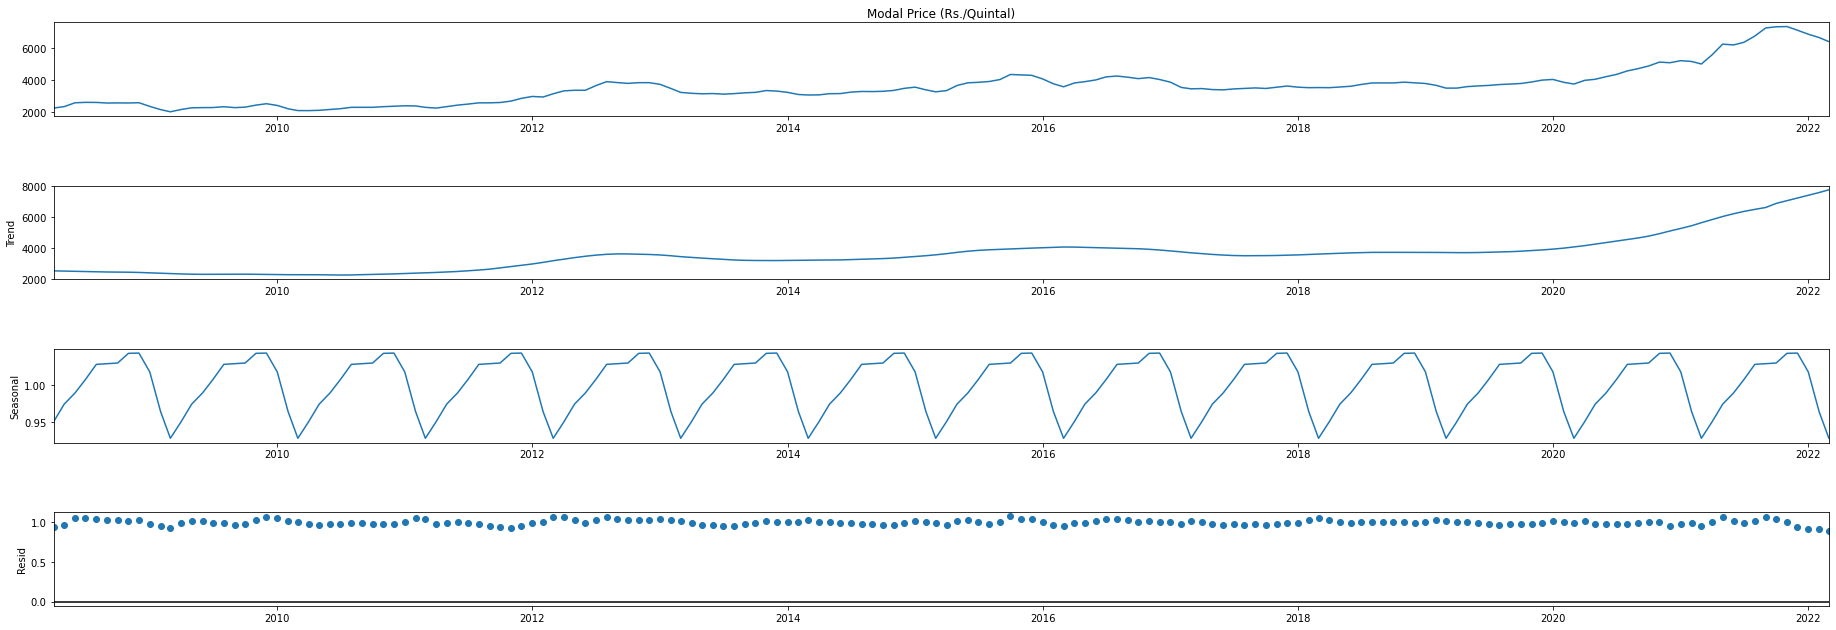

In [7]:
def seasonal_decompose_mul(y):
     decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative',extrapolate_trend='freq')
     fig = decomposition.plot()
     fig.set_size_inches(30,10)
     plt.show()

seasonal_decompose_mul(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'])

##### Seasonal Plots for Time Series Data

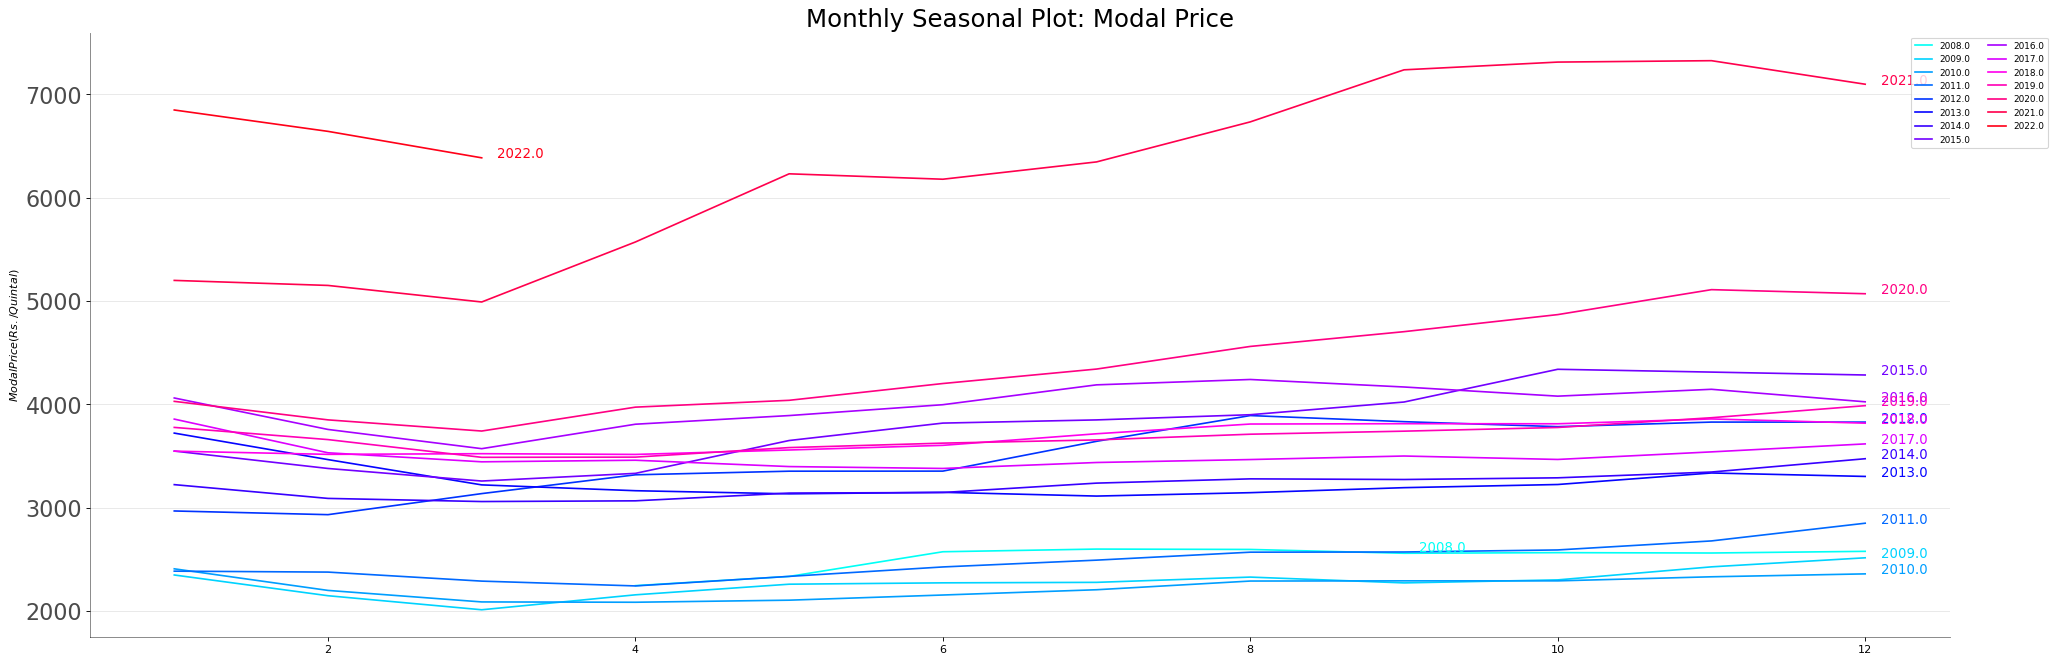

In [8]:

# Draw Plot
#rainbow(np.linspace(0.5, 1, 15))
#hsv(np.linspace(0.5, 1, 15))
mycolors = cm.hsv(np.linspace(0.5, 1, 15))
plt.figure(figsize=(30,10), dpi= 80)

for i, y in enumerate(years):
    plt.plot(
        'Month', 
        'Modal Price (Rs./Quintal)', 
        data = CropData_Summarized.loc[CropData_Summarized.Year == y, :], 
        color=mycolors[i], 
        label=y
    )
    plt.text(
        CropData_Summarized.loc[CropData_Summarized.Year==y, :].shape[0]+0.1, 
        CropData_Summarized.loc[CropData_Summarized.Year==y, 'Modal Price (Rs./Quintal)'][-1:].values[0] + 0.2, 
        y, 
        fontsize=12, 
        color=mycolors[i]
    )

    
# Decoration

plt.ylabel('$Modal Price (Rs./Quintal)$')
plt.yticks(fontsize=20, alpha=.7)
plt.title("Monthly Seasonal Plot: Modal Price", fontsize=22)
plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
plt.legend(loc=0, 
           ncol=2, 
           fontsize=8,
          bbox_to_anchor=(0.555, 0.5, 0.5, 0.5))
plt.show()

##### Polar Plots for Ranges

In [9]:
fig = px.line_polar(
    CropData_Summarized, r="Modal Price (Rs./Quintal)",
    color = "Year",
    theta =  CropData_Summarized.set_index('Yr-mon').index.strftime('%B'),
    line_close=False,
    color_discrete_sequence=px.colors.sequential.Plasma_r,
    template="plotly_dark"
   )
fig.show()

In [10]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

CropData_Summarized[CropData_Summarized['Modal Price (Rs./Quintal)'].shift(12).notnull()]

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
12  2009-04-01              1834.209134              1974.845651   
13  2009-05-01              1956.036930              2055.618733   
14  2009-06-01              1963.290588              2057.305463   
15  2009-07-01              1902.349464              1994.891188   
16  2009-08-01              1882.710427              1972.661702   
..         ...                      ...                      ...   
163 2021-11-01              7147.131780              7425.545886   
164 2021-12-01              6895.516610              7190.095399   
165 2022-01-01              6612.206225              6959.096469   
166 2022-02-01              6275.087460              6867.760500   
167 2022-03-01              6079.680151              6590.310789   

     Modal Price (Rs./Quintal)    Year  Month  
12                 2156.120807  2009.0    4.0  
13                 2258.910047  2009.0    5.0  
14                 2272.102741  2009.0    6.0  
15                 2276.739715  2009.0    7.0  
16                 2327.703141  2009.0    8.0  
..                         ...     ...    ...  
163                7324.340586  2021.0   11.0  
164                7096.493960  2021.0   12.0  
165                6847.179651  2022.0    1.0  
166                6640.370247  2022.0    2.0  
167                6384.374227  2022.0    3.0  

[156 rows x 6 columns]

##### Lag Plots

###### Lag plots help us check whether a data set or a time series is random 
###### Random data donot exhibit any identifieable structure 

###### A lag is a fixed time displacement , would whether is  there any correlation in data and would help us find  a suitable model for the data and also helps us to find outliers


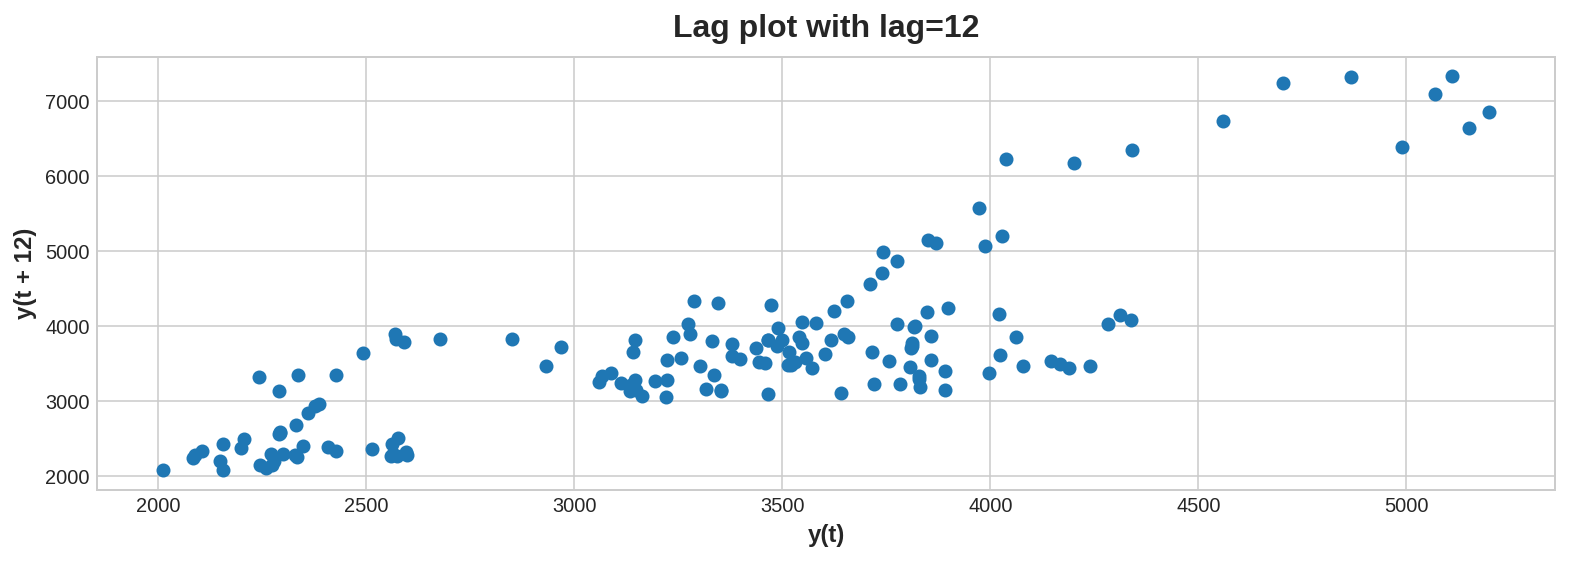

In [11]:
plt.title("Lag plot with lag=12")
pd.plotting.lag_plot(CropData_Summarized['Modal Price (Rs./Quintal)'] , lag = 12)
plt.show(block=True)

Text(0.5, 1.0, 'Lag Plot of Modal Price (Lag = 12)')

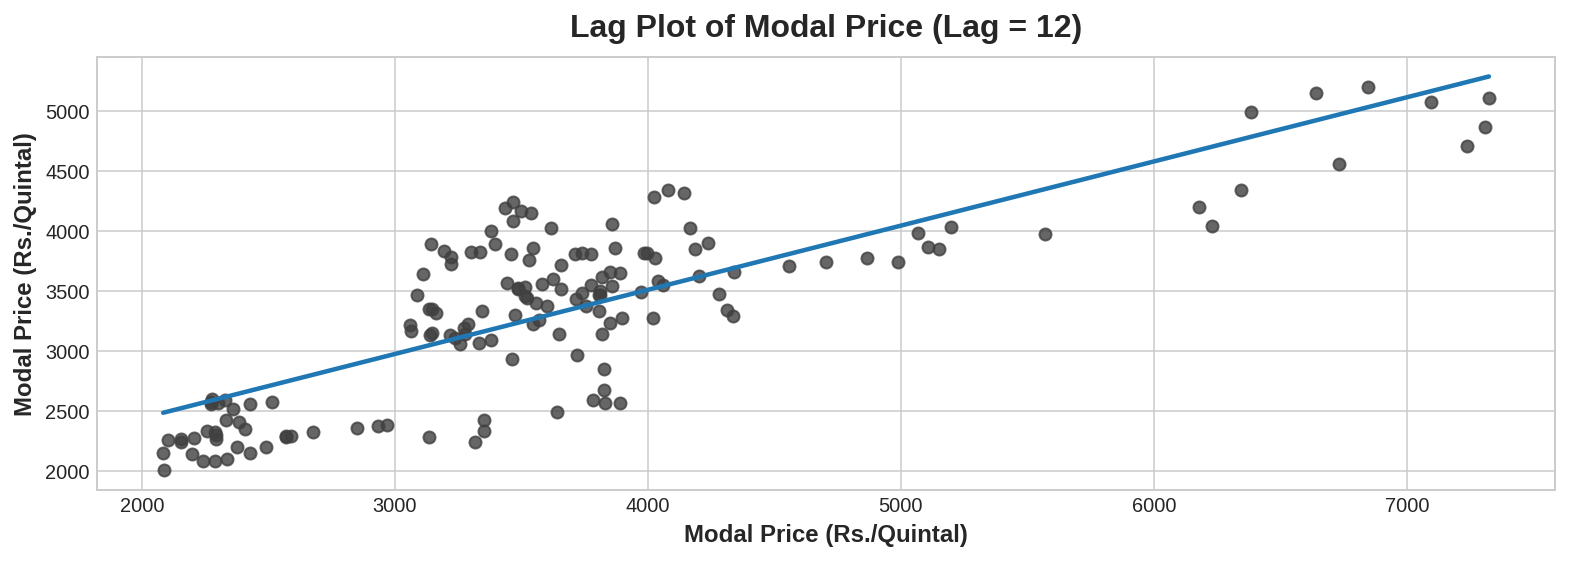

In [12]:
fig, ax = plt.subplots()

ax = sns.regplot(
    x= 'Modal Price (Rs./Quintal)', 
    y=CropData_Summarized['Modal Price (Rs./Quintal)'].shift(12), 
    data = CropData_Summarized, 
    ci=None,
    scatter_kws=dict(color='0.25')
)


#ax.set_aspect('equal')
ax.set_title('Lag Plot of Modal Price (Lag = 12)')

#### Autocorrelation

The ACF plot can provide answers to the following questions:

Is the observed time series white noise / random?



Is an observation related to an adjacent observation, an observation twice-removed, and so on?



Can the observed time series be modeled with an MA model? If yes, what is the order?

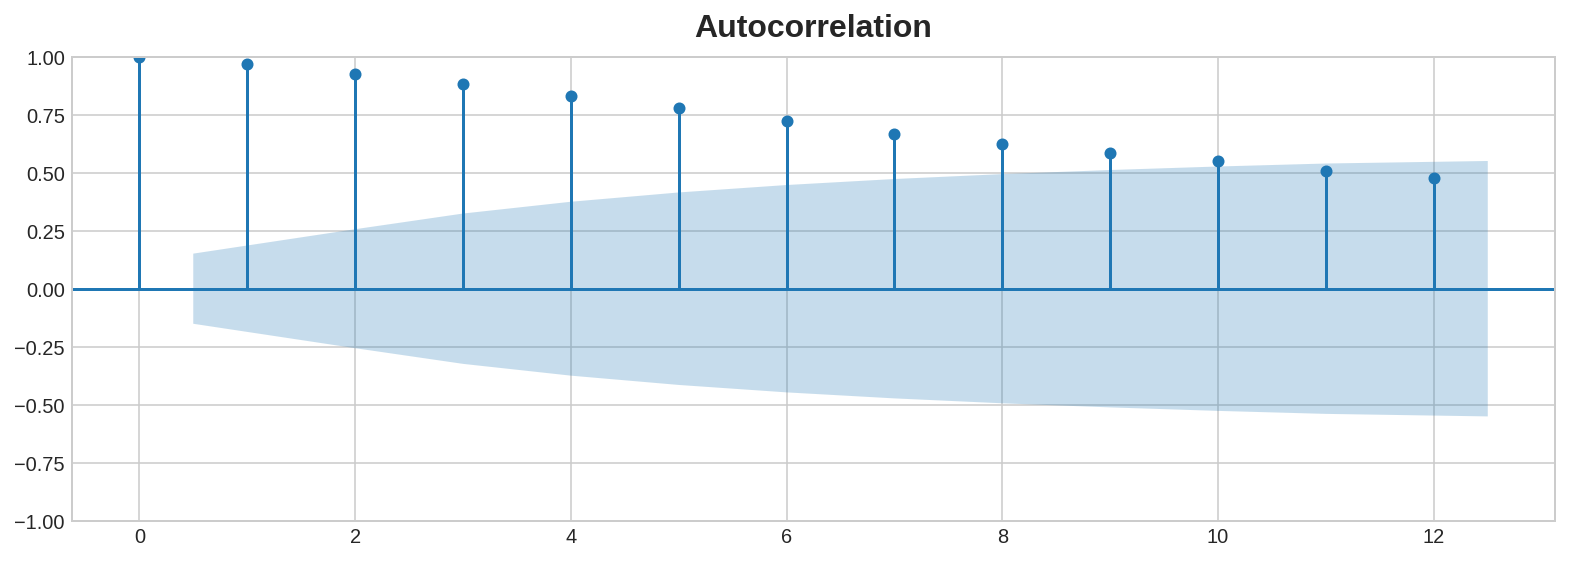

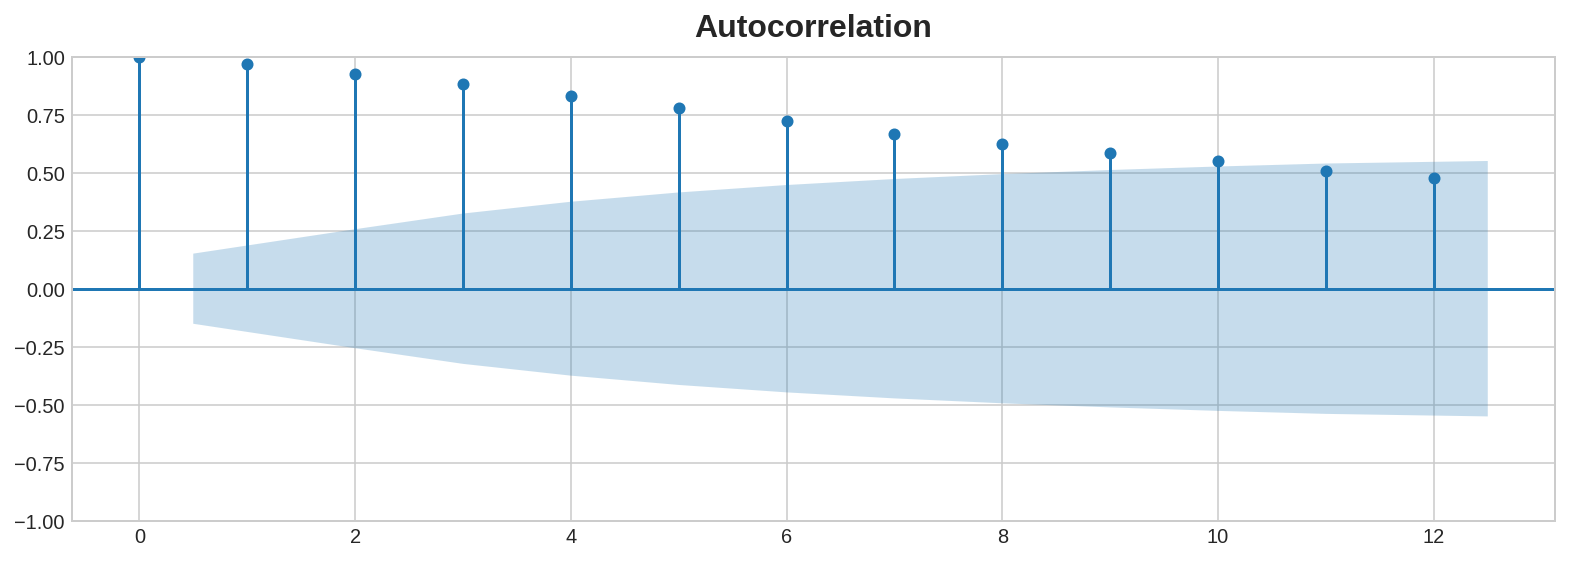

In [13]:
plot_acf(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] ,lags = 12)

##### So for 95% confidence interval Significant correlation for lag 10 data but not lag 11 or 12 data or only from lag 11 data starts to become stationary

##### Autocorrelation graphs would tell us whether we have trends or any seasonal components in the time series 
##### Here we do have trend component in the time series 
##### But we cannot tell whether what kind of trend it is +VE or -VE trend 

### Partial Autocorrelation

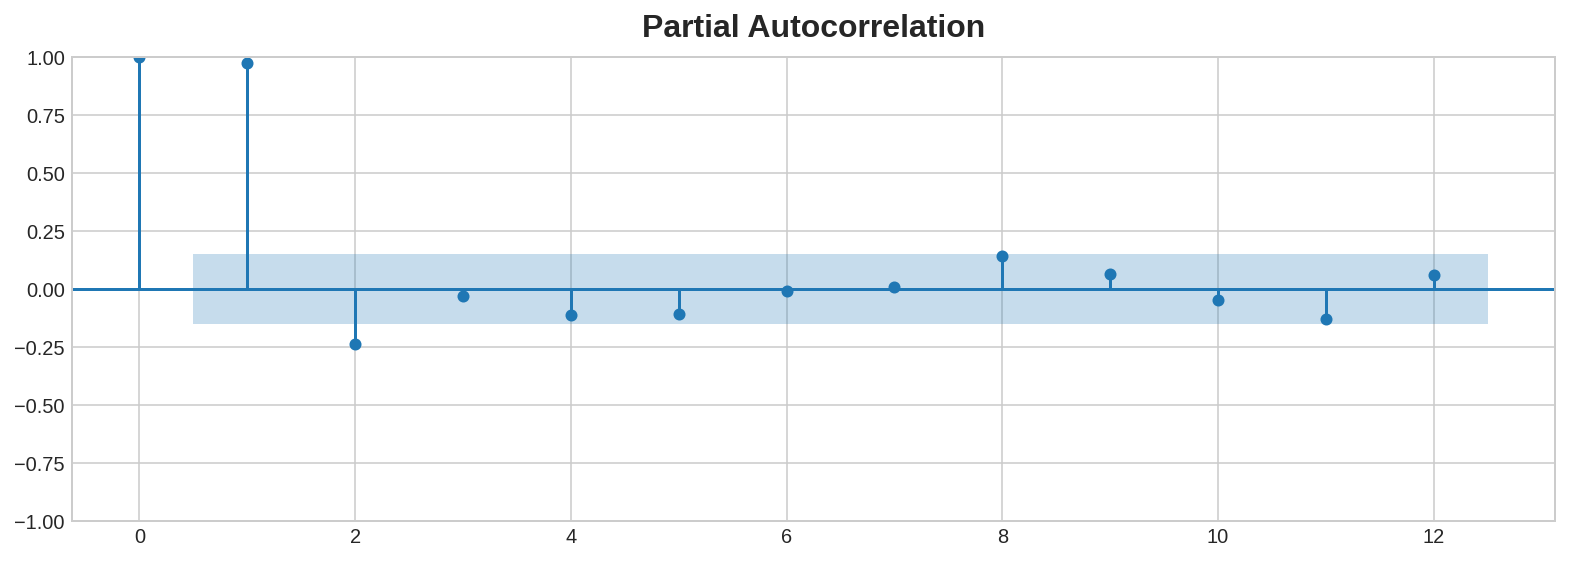

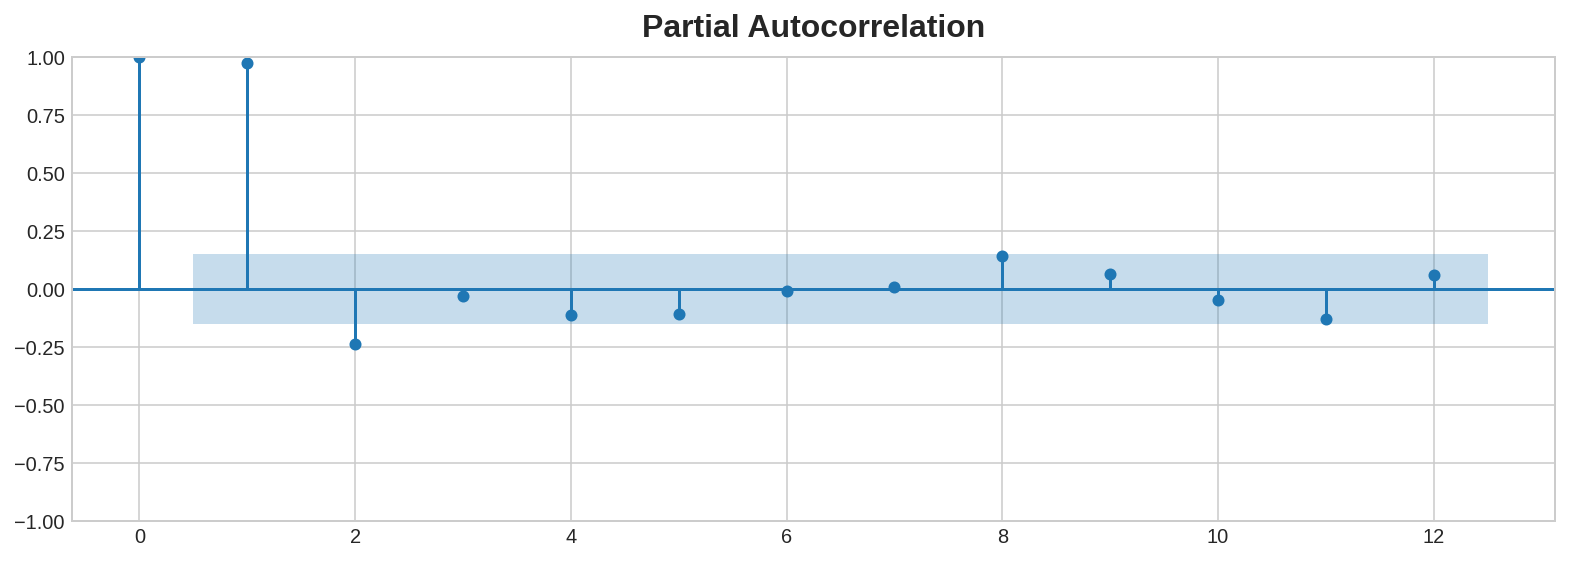

In [14]:
plot_pacf(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],lags = 12)

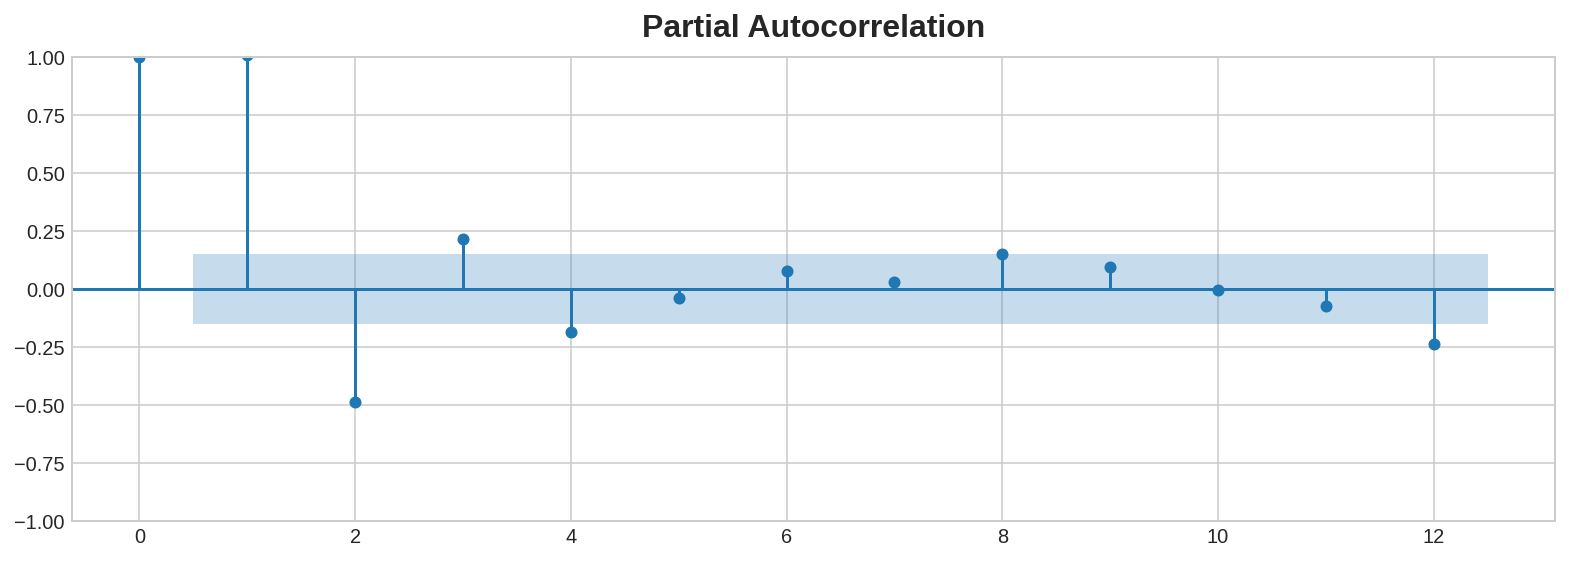

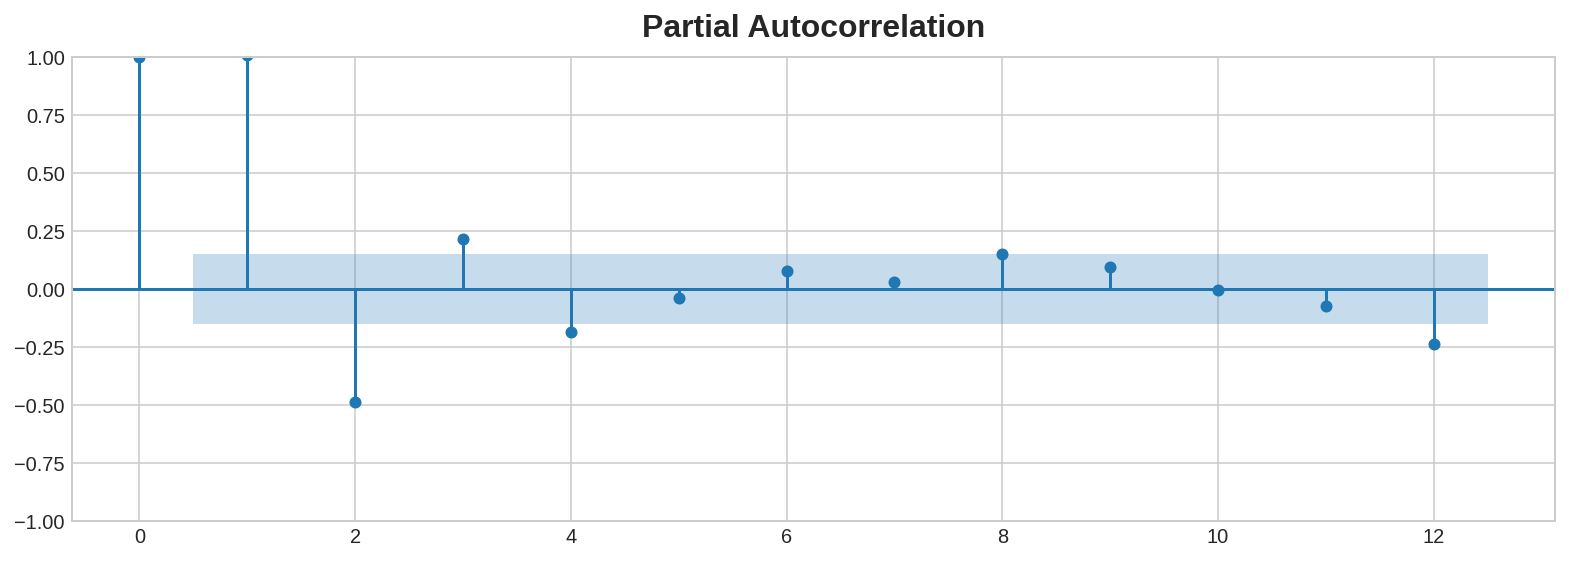

In [15]:
plot_pacf(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],lags = 12,method = "ols")

##### Large spike at lag 1 that decreases after a few lags. ---	A moving average term in the data. Use the autocorrelation function to determine the order of the moving average term.

##### Large spike at lag 1 followed by a damped wave that alternates between positive and negative correlations.	---  A higher order moving average term in the data. Use the autocorrelation function to determine the order of the moving average term.

##### Significant correlations at the first or second lag, followed by correlations that are not significant. ---	An autoregressive term in the data. The number of significant correlations indicate the order of the autoregressive term.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

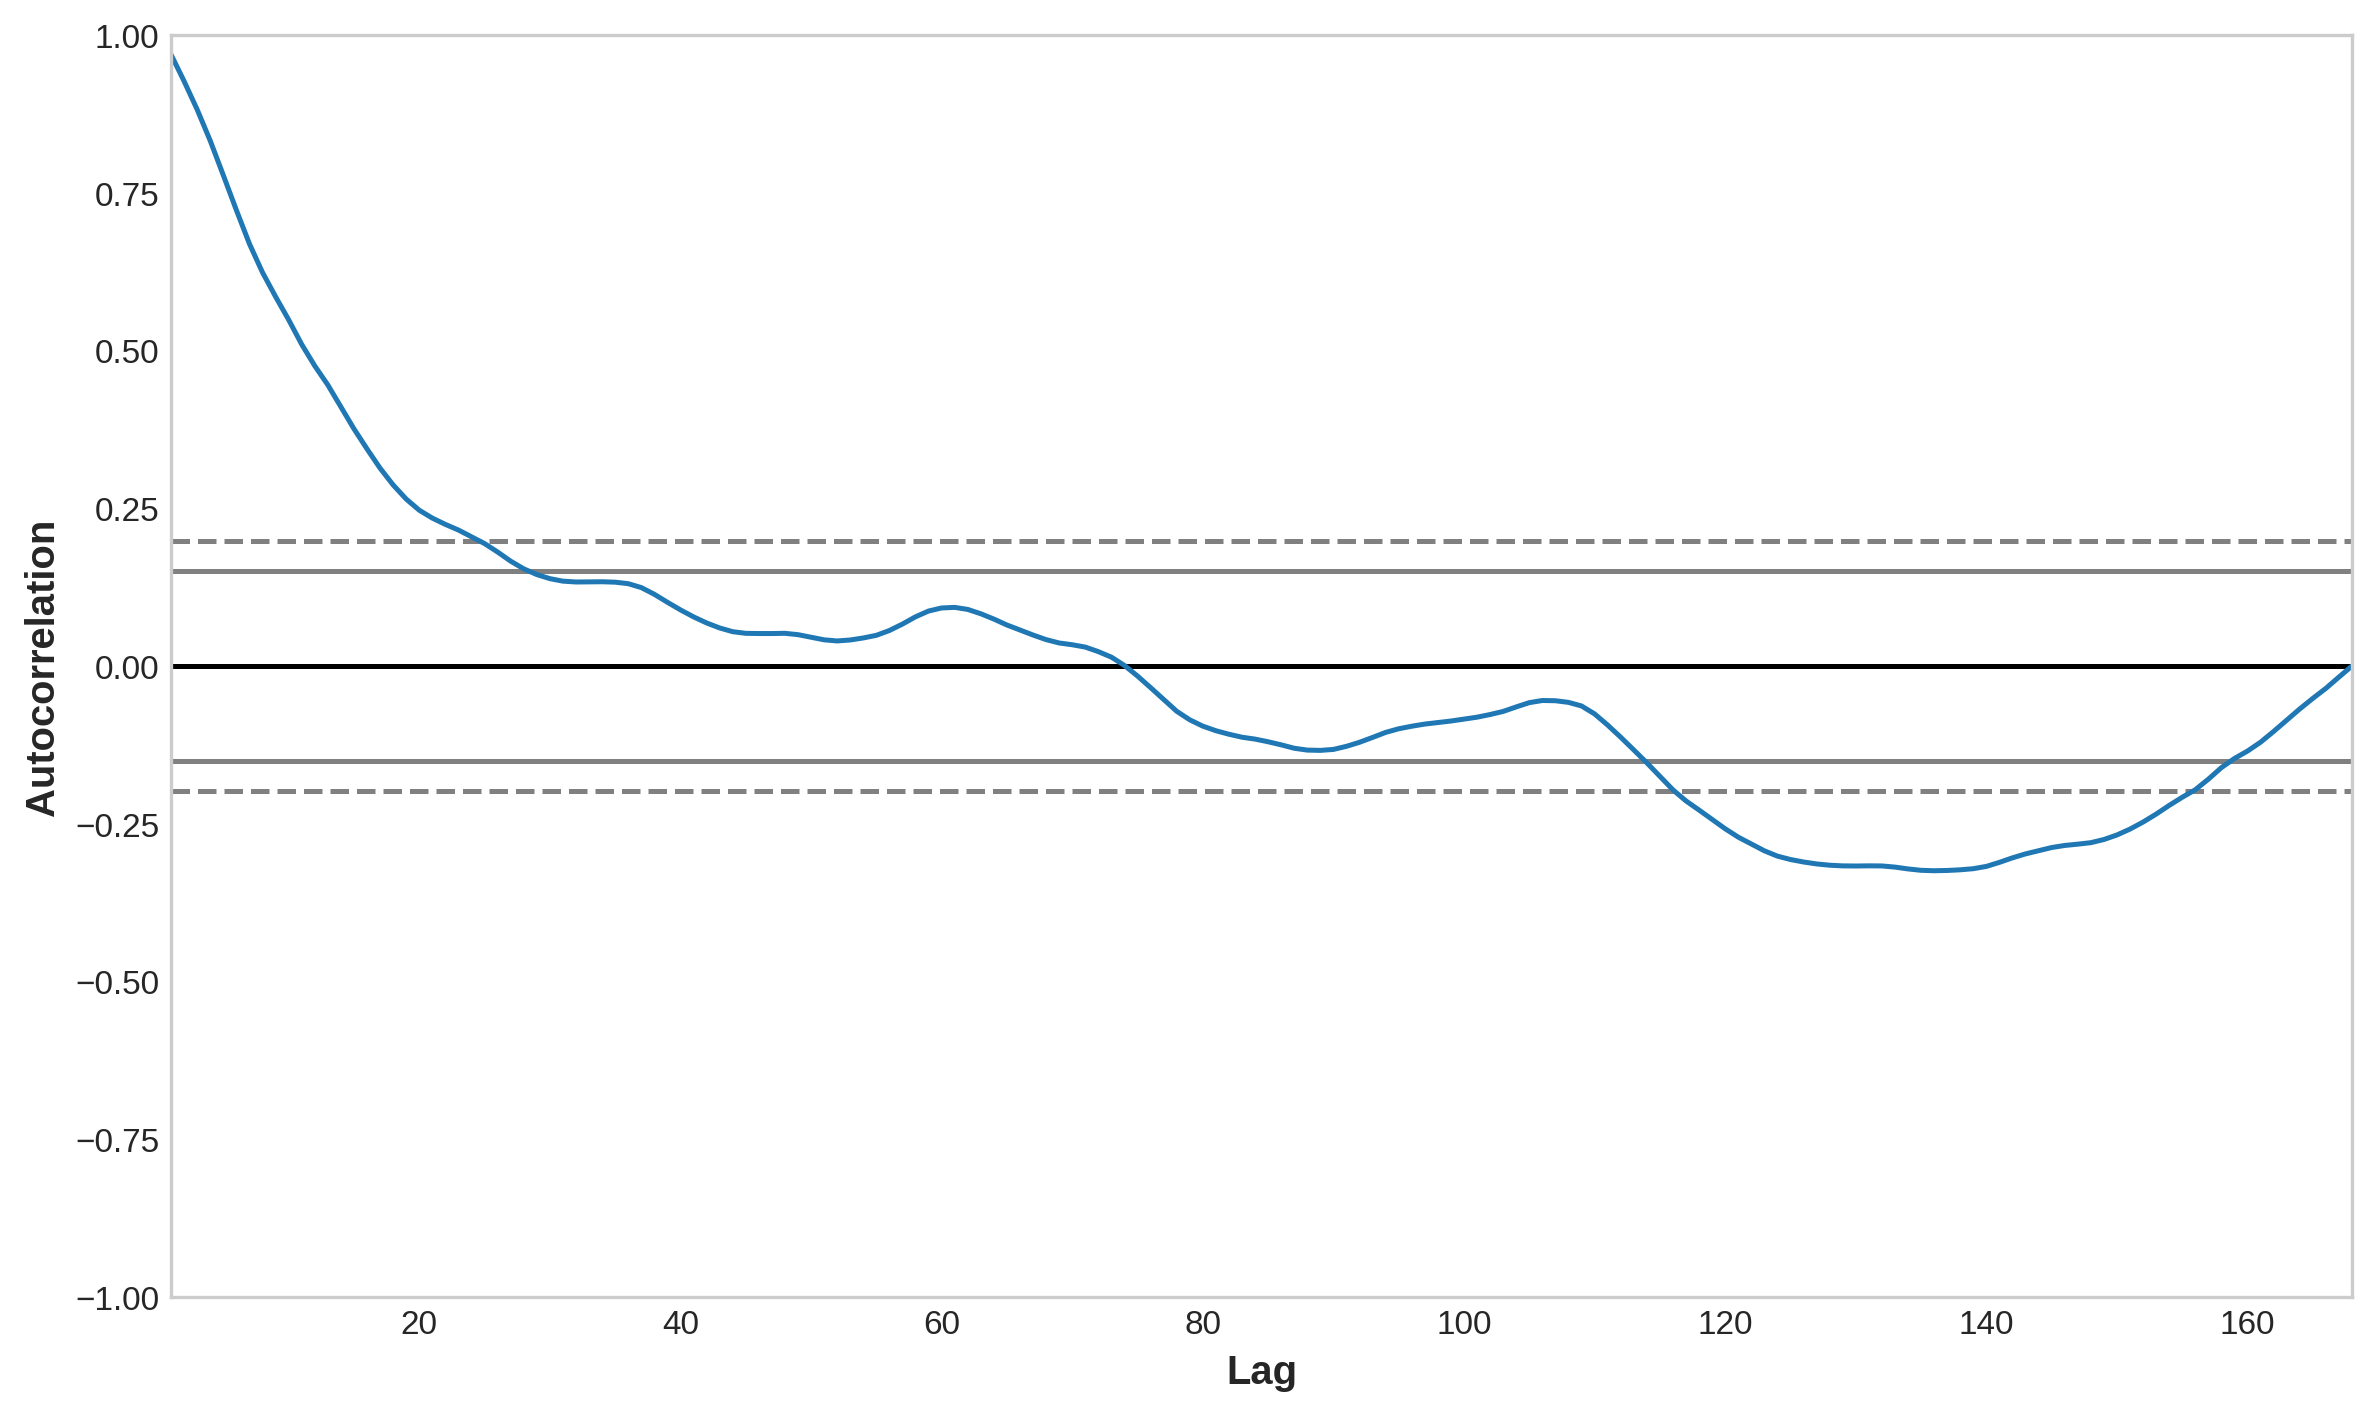

In [16]:
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'].tolist())

### Stationarity 

###### A stationary time series is one whose properties do not depend on the time at which the series is observed.
###### When modeling time series, we often want our sequence of observations to be stationary. This is because it is much easier to forecast a stationary series, as it is more stable than a non-stationary series.
###### Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. 


In [17]:
def test_stationarity(timeseries, title):
    
    """
    Determing rolling statistics
    Rolling mean , lag = 12
    Rolling Std deviation , lag = 12
    """
    
    
    rolmean = pd.Series(timeseries).rolling(window=12,center=True).mean()
    rolmean.index = pd.to_datetime(rolmean.index, format = '%Y-%m-%d')
    
    """
    print(rolmean[rolmean.index.year == 2008])
    print(rolmean.index)
    print(rolmean.index.dtype)
    print(rolmean.dtypes)
    print(rolmean)
    """
    

    rolstd = pd.Series(timeseries).rolling(window=12).std()
    rolstd.index = pd.to_datetime(rolstd.index, format = '%Y-%m-%d')
    
    """
    Printing Data
    print(rolstd.dtypes)
    print(rolstd)
    
    Plotting using matplotlib
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='Rolling mean')
    ax.plot(rolstd, label='Rolling std (x10)')
    ax.legend()
    
    
    Following is interactive plotting using PLotly 
    """
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=timeseries.index,
        y=timeseries,
        mode='lines' ,
        name = "Modal Price"
    ))
    
    fig.add_trace(go.Scatter(
        x=timeseries.index,
        y=rolmean,
        mode='lines' , #+markers
        name = "Rolling mean "
    ))

    fig.add_trace(go.Scatter(
        x=timeseries.index,
        y=rolstd,
        mode='lines' , #+markers
        name = "Rolling std (x10) "
    ))
    

    fig.show()    

In [18]:
pd.options.display.float_format = '{:.8f}'.format

test_stationarity(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],'CropData_Summarized')

###### White noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time

##### Tests fot stationarity 

 #####   ->  Augmented Dicky Fuller Test (ADF)
    
 #####   ->  Kwiatkowski–Phillips–Schmidt–Shin (KPSS)

In [19]:
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print(dftest,'\n')
    print('Lag : {}'.format(dftest[2]))
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    
    
    dftest = adfuller(timeseries.dropna(), maxlag =12 )
    print('\n' , dftest , '\n')
    print('Lag : {}'.format(dftest[2]))
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [20]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, nlags = 12 ,**kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [21]:
CropData_Summarized

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0   2008-04-01            1972.00963608            2205.36717374   
1   2008-05-01            2064.28117098            2281.46805096   
2   2008-06-01            2275.34649658            2465.06094360   
3   2008-07-01            2256.71813305            2478.50493562   
4   2008-08-01            2326.43164150            2486.02664823   
..         ...                      ...                      ...   
163 2021-11-01            7147.13177975            7425.54588575   
164 2021-12-01            6895.51661041            7190.09539883   
165 2022-01-01            6612.20622497            6959.09646888   
166 2022-02-01            6275.08746048            6867.76049977   
167 2022-03-01            6079.68015073            6590.31078909   

     Modal Price (Rs./Quintal)          Year       Month  
0                2245.05707396 2008.00000000  4.00000000  
1                2334.04088310 2008.00000000  5.00000000  
2                2572.88038574 2008.00000000  6.00000000  
3                2598.77682403 2008.00000000  7.00000000  
4                2595.23441471 2008.00000000  8.00000000  
..                         ...           ...         ...  
163              7324.34058569 2021.00000000 11.00000000  
164              7096.49395985 2021.00000000 12.00000000  
165              6847.17965053 2022.00000000  1.00000000  
166              6640.37024688 2022.00000000  2.00000000  
167              6384.37422698 2022.00000000  3.00000000  

[168 rows x 6 columns]

In [22]:
ADF_test(
    CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'] ,
    'CropData_Summarised'
)

 > Is the CropData_Summarised stationary ?
(-0.535511457040433, 0.8848984155536058, 14, 153, {'1%': -3.473829775724492, '5%': -2.880622899711496, '10%': -2.5769448985432954}, 1910.0708295480404) 

Lag : 14
Test statistic = -0.536
P-value = 0.885
Critical values :
	1%: -3.473829775724492 - The data is not stationary with 99% confidence
	5%: -2.880622899711496 - The data is not stationary with 95% confidence
	10%: -2.5769448985432954 - The data is not stationary with 90% confidence

 (-0.9906650081995098, 0.7566537796605814, 12, 155, {'1%': -3.4732590518613002, '5%': -2.880374082105334, '10%': -2.5768120811654525}, 1936.7450744226574) 

Lag : 12
Test statistic = -0.991
P-value = 0.757
Critical values :
	1%: -3.4732590518613002 - The data is not stationary with 99% confidence
	5%: -2.880374082105334 - The data is not stationary with 95% confidence
	10%: -2.5768120811654525 - The data is not stationary with 90% confidence


In [23]:
kpss_test(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'])

KPSS Statistic: 1.0410880890059988
p-value: 0.01
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In [24]:
kpss_test(
    CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
    regression='ct')

KPSS Statistic: 0.11705335560700446
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


###### So overall what this means to us is, if a series is stationary according to the KPSS test by setting regression='ct' and is not stationary according to the ADF test, it means the series is stationary around a DETERMINISTIC TREND and so is fairly easy to model this series and produce fairly accurate forecasts.

#### Detrending 

###### 1 . Simple Moving Average
######       Period = 12

In [25]:
def SMA(timeseries , title , x_title , y_title ) :
    rolmean = timeseries.rolling(
        window=12,
        center=True
    ).mean()
    
    
    rolmean.index = pd.to_datetime(rolmean.index, 
                                   format = '%Y-%m-%d'
                                  )
    
    fig = go.Figure()
    fig = make_subplots(rows=2, cols=1)
    
    fig.add_trace(go.Scatter(x=timeseries.index,y=timeseries,mode='lines',name = "Modal Price") , row=1, col=1)
    fig.add_trace(go.Scatter(x=timeseries.index,y=rolmean,mode='lines' , name = "Simple moving Average"),row=1, col=1)
    
    fig.update_layout(legend_title_text = "Modal VS Moving Avg ")
    fig.update_layout(title_text=title,title_y=0.85,title_x=0.5)
    fig.update_xaxes(title_text=x_title)
    fig.update_yaxes(title_text=y_title)
    
        
    fig.add_trace(go.Scatter(x=timeseries.index,y=timeseries,
                             mode='lines',
                             name = "Modal Price") , row=2, col=1)
    
    fig.add_trace(go.Scatter(x=timeseries.index,y=timeseries - rolmean,
                             mode='lines' , 
                             name = "Price - SMA"),row=2, col=1)

    fig.update_layout(legend_title_text = "Modal VS Modal - Moving Avg ")
    fig.update_layout(title_text=title,title_y=0.85,title_x=0.5)
    fig.update_xaxes(title_text=x_title)
    fig.update_yaxes(title_text=y_title)
    
    fig.show() 
    
    print(type(rolmean))

In [26]:
SMA(CropData_Summarized.set_index('Yr-mon')['Modal Price (Rs./Quintal)'],
    'Modal Price for Financial Year data of years 2008-2022',
    'Years 2008-2022',
    'Modal Prices')

<class 'pandas.core.series.Series'>


In [28]:
dummy = pd.DataFrame(CropData_Summarized)

In [29]:
dummy

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0   2008-04-01            1972.00963608            2205.36717374   
1   2008-05-01            2064.28117098            2281.46805096   
2   2008-06-01            2275.34649658            2465.06094360   
3   2008-07-01            2256.71813305            2478.50493562   
4   2008-08-01            2326.43164150            2486.02664823   
..         ...                      ...                      ...   
163 2021-11-01            7147.13177975            7425.54588575   
164 2021-12-01            6895.51661041            7190.09539883   
165 2022-01-01            6612.20622497            6959.09646888   
166 2022-02-01            6275.08746048            6867.76049977   
167 2022-03-01            6079.68015073            6590.31078909   

     Modal Price (Rs./Quintal)          Year       Month  
0                2245.05707396 2008.00000000  4.00000000  
1                2334.04088310 2008.00000000  5.00000000  
2                2572.88038574 2008.00000000  6.00000000  
3                2598.77682403 2008.00000000  7.00000000  
4                2595.23441471 2008.00000000  8.00000000  
..                         ...           ...         ...  
163              7324.34058569 2021.00000000 11.00000000  
164              7096.49395985 2021.00000000 12.00000000  
165              6847.17965053 2022.00000000  1.00000000  
166              6640.37024688 2022.00000000  2.00000000  
167              6384.37422698 2022.00000000  3.00000000  

[168 rows x 6 columns]

In [30]:
CropData_Summarized

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0   2008-04-01            1972.00963608            2205.36717374   
1   2008-05-01            2064.28117098            2281.46805096   
2   2008-06-01            2275.34649658            2465.06094360   
3   2008-07-01            2256.71813305            2478.50493562   
4   2008-08-01            2326.43164150            2486.02664823   
..         ...                      ...                      ...   
163 2021-11-01            7147.13177975            7425.54588575   
164 2021-12-01            6895.51661041            7190.09539883   
165 2022-01-01            6612.20622497            6959.09646888   
166 2022-02-01            6275.08746048            6867.76049977   
167 2022-03-01            6079.68015073            6590.31078909   

     Modal Price (Rs./Quintal)          Year       Month  
0                2245.05707396 2008.00000000  4.00000000  
1                2334.04088310 2008.00000000  5.00000000  
2                2572.88038574 2008.00000000  6.00000000  
3                2598.77682403 2008.00000000  7.00000000  
4                2595.23441471 2008.00000000  8.00000000  
..                         ...           ...         ...  
163              7324.34058569 2021.00000000 11.00000000  
164              7096.49395985 2021.00000000 12.00000000  
165              6847.17965053 2022.00000000  1.00000000  
166              6640.37024688 2022.00000000  2.00000000  
167              6384.37422698 2022.00000000  3.00000000  

[168 rows x 6 columns]

In [31]:
dummy= CropData_Summarized.copy(deep = True) 
dummy['Year'] = dummy.set_index('Yr-mon').index.year
dummy['Month'] = dummy.set_index('Yr-mon').index.month

dummy

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0   2008-04-01            1972.00963608            2205.36717374   
1   2008-05-01            2064.28117098            2281.46805096   
2   2008-06-01            2275.34649658            2465.06094360   
3   2008-07-01            2256.71813305            2478.50493562   
4   2008-08-01            2326.43164150            2486.02664823   
..         ...                      ...                      ...   
163 2021-11-01            7147.13177975            7425.54588575   
164 2021-12-01            6895.51661041            7190.09539883   
165 2022-01-01            6612.20622497            6959.09646888   
166 2022-02-01            6275.08746048            6867.76049977   
167 2022-03-01            6079.68015073            6590.31078909   

     Modal Price (Rs./Quintal)  Year  Month  
0                2245.05707396  2008      4  
1                2334.04088310  2008      5  
2                2572.88038574  2008      6  
3                2598.77682403  2008      7  
4                2595.23441471  2008      8  
..                         ...   ...    ...  
163              7324.34058569  2021     11  
164              7096.49395985  2021     12  
165              6847.17965053  2022      1  
166              6640.37024688  2022      2  
167              6384.37422698  2022      3  

[168 rows x 6 columns]

In [32]:
dummy['SMA(12)'] = dummy.rolling(12,center = True).mean()['Modal Price (Rs./Quintal)']
dummy[dummy['SMA(12)'].notnull()]

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
6   2008-10-01            2199.78234354            2370.96858176   
7   2008-11-01            2268.93149314            2411.32683781   
8   2008-12-01            2240.49031927            2419.77106039   
9   2009-01-01            1983.31476167            2208.95174070   
10  2009-02-01            1830.03768844            2039.32783361   
..         ...                      ...                      ...   
158 2021-06-01            5989.13746340            6300.59304207   
159 2021-07-01            6166.85275679            6452.76418582   
160 2021-08-01            6545.54941258            6840.65704907   
161 2021-09-01            7039.99917342            7348.16465531   
162 2021-10-01            7132.41909621            7423.93385569   

     Modal Price (Rs./Quintal)  Year  Month       SMA(12)  
6                2564.29205922  2008     10 2426.09158826  
7                2560.76530320  2008     11 2418.68023267  
8                2576.86761123  2008     12 2412.41932970  
9                2348.05446718  2009      1 2387.35452594  
10               2147.43990620  2009      2 2360.51810018  
..                         ...   ...    ...           ...  
158              6177.38868084  2021      6 6111.00186324  
159              6344.84190645  2021      7 6279.93116136  
160              6732.23462336  2021      8 6417.33793304  
161              7235.83236899  2021      9 6541.56170845  
162              7310.73533163  2021     10 6657.80159611  

[157 rows x 7 columns]

In [33]:
dummy['Price-SMA(12)'] = dummy['Modal Price (Rs./Quintal)']-dummy[dummy['SMA(12)'].notnull()]['SMA(12)']
dummy[dummy['SMA(12)'].notnull()]

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
6   2008-10-01            2199.78234354            2370.96858176   
7   2008-11-01            2268.93149314            2411.32683781   
8   2008-12-01            2240.49031927            2419.77106039   
9   2009-01-01            1983.31476167            2208.95174070   
10  2009-02-01            1830.03768844            2039.32783361   
..         ...                      ...                      ...   
158 2021-06-01            5989.13746340            6300.59304207   
159 2021-07-01            6166.85275679            6452.76418582   
160 2021-08-01            6545.54941258            6840.65704907   
161 2021-09-01            7039.99917342            7348.16465531   
162 2021-10-01            7132.41909621            7423.93385569   

     Modal Price (Rs./Quintal)  Year  Month       SMA(12)  Price-SMA(12)  
6                2564.29205922  2008     10 2426.09158826   138.20047096  
7                2560.76530320  2008     11 2418.68023267   142.08507053  
8                2576.86761123  2008     12 2412.41932970   164.44828153  
9                2348.05446718  2009      1 2387.35452594   -39.30005875  
10               2147.43990620  2009      2 2360.51810018  -213.07819399  
..                         ...   ...    ...           ...            ...  
158              6177.38868084  2021      6 6111.00186324    66.38681761  
159              6344.84190645  2021      7 6279.93116136    64.91074508  
160              6732.23462336  2021      8 6417.33793304   314.89669032  
161              7235.83236899  2021      9 6541.56170845   694.27066053  
162              7310.73533163  2021     10 6657.80159611   652.93373552  

[157 rows x 8 columns]

In [34]:
dummy[dummy['SMA(12)'].notnull()].groupby('Month').mean()['Price-SMA(12)']

Month
1      75.99355088
2    -103.34125975
3    -224.79580428
4    -150.15782530
5     -65.51169489
6     -47.65355437
7      15.34987591
8      95.87029476
9     120.45573637
10    132.64587006
11    144.84883388
12    147.78389406
Name: Price-SMA(12), dtype: float64

In [35]:
PrSmaMon = pd.DataFrame(dummy[dummy['SMA(12)'].notnull()].groupby('Month').mean()['Price-SMA(12)'])
PrSmaMon

Price-SMA(12)
Month               
1        75.99355088
2      -103.34125975
3      -224.79580428
4      -150.15782530
5       -65.51169489
6       -47.65355437
7        15.34987591
8        95.87029476
9       120.45573637
10      132.64587006
11      144.84883388
12      147.78389406

In [36]:
k = PrSmaMon.mean()
k

Price-SMA(12)   11.79065978
dtype: float64

In [37]:
PrSmaMon = PrSmaMon.subtract(k)
PrSmaMon

Price-SMA(12)
Month               
1        64.20289110
2      -115.13191953
3      -236.58646405
4      -161.94848508
5       -77.30235467
6       -59.44421415
7         3.55921614
8        84.07963499
9       108.66507659
10      120.85521028
11      133.05817410
12      135.99323428

In [38]:
PrSmaMon.mean()

Price-SMA(12)   0.00000000
dtype: float64

In [39]:
CropData_Summarized['Year'] = CropData_Summarized.set_index('Yr-mon').index.year
CropData_Summarized['Month'] = CropData_Summarized.set_index('Yr-mon').index.month

In [40]:
CropData_Summarized

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0   2008-04-01            1972.00963608            2205.36717374   
1   2008-05-01            2064.28117098            2281.46805096   
2   2008-06-01            2275.34649658            2465.06094360   
3   2008-07-01            2256.71813305            2478.50493562   
4   2008-08-01            2326.43164150            2486.02664823   
..         ...                      ...                      ...   
163 2021-11-01            7147.13177975            7425.54588575   
164 2021-12-01            6895.51661041            7190.09539883   
165 2022-01-01            6612.20622497            6959.09646888   
166 2022-02-01            6275.08746048            6867.76049977   
167 2022-03-01            6079.68015073            6590.31078909   

     Modal Price (Rs./Quintal)  Year  Month  
0                2245.05707396  2008      4  
1                2334.04088310  2008      5  
2                2572.88038574  2008      6  
3                2598.77682403  2008      7  
4                2595.23441471  2008      8  
..                         ...   ...    ...  
163              7324.34058569  2021     11  
164              7096.49395985  2021     12  
165              6847.17965053  2022      1  
166              6640.37024688  2022      2  
167              6384.37422698  2022      3  

[168 rows x 6 columns]

In [41]:
PrSmaMon

Price-SMA(12)
Month               
1        64.20289110
2      -115.13191953
3      -236.58646405
4      -161.94848508
5       -77.30235467
6       -59.44421415
7         3.55921614
8        84.07963499
9       108.66507659
10      120.85521028
11      133.05817410
12      135.99323428

In [42]:
PrSmaMon.reset_index()

Month  Price-SMA(12)
0       1    64.20289110
1       2  -115.13191953
2       3  -236.58646405
3       4  -161.94848508
4       5   -77.30235467
5       6   -59.44421415
6       7     3.55921614
7       8    84.07963499
8       9   108.66507659
9      10   120.85521028
10     11   133.05817410
11     12   135.99323428

In [43]:
outer_join_df=pd.merge(CropData_Summarized, PrSmaMon.reset_index(), on='Month', how='outer')
outer_join_df

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0   2008-04-01            1972.00963608            2205.36717374   
1   2009-04-01            1834.20913381            1974.84565056   
2   2010-04-01            1708.76138719            1830.93529036   
3   2011-04-01            1813.66979230            1950.14154666   
4   2012-04-01            2855.98522691            3077.53577056   
..         ...                      ...                      ...   
163 2018-03-01            3372.18518407            3618.52350634   
164 2019-03-01            3319.76228898            3599.29099429   
165 2020-03-01            3574.87104753            3856.14946654   
166 2021-03-01            4787.34246264            5131.80994152   
167 2022-03-01            6079.68015073            6590.31078909   

     Modal Price (Rs./Quintal)  Year  Month  Price-SMA(12)  
0                2245.05707396  2008      4  -161.94848508  
1                2156.12080696  2009      4  -161.94848508  
2                2084.28943632  2010      4  -161.94848508  
3                2242.21704514  2011      4  -161.94848508  
4                3317.32429877  2012      4  -161.94848508  
..                         ...   ...    ...            ...  
163              3521.64801448  2018      3  -236.58646405  
164              3486.51596326  2019      3  -236.58646405  
165              3740.86981571  2020      3  -236.58646405  
166              4989.49557505  2021      3  -236.58646405  
167              6384.37422698  2022      3  -236.58646405  

[168 rows x 7 columns]

In [44]:
outer_join_df[outer_join_df['Month'] == 1]

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
126 2009-01-01            1983.31476167            2208.95174070   
127 2010-01-01            1857.19671524            1965.67572240   
128 2011-01-01            1826.93238671            1910.22995694   
129 2012-01-01            2487.35013882            2627.75996971   
130 2013-01-01            2813.61655978            2943.62752379   
131 2014-01-01            2543.92142490            2673.67168564   
132 2015-01-01            3170.61837334            3331.99257468   
133 2016-01-01            3063.25343811            3232.82023576   
134 2017-01-01            2904.15083477            3098.79408943   
135 2018-01-01            3439.08138635            3608.88967972   
136 2019-01-01            3684.48985161            3845.64284496   
137 2020-01-01            3910.08796296            4095.84953704   
138 2021-01-01            5036.19804401            5292.65484923   
139 2022-01-01            6612.20622497            6959.09646888   

     Modal Price (Rs./Quintal)  Year  Month  Price-SMA(12)  
126              2348.05446718  2009      1    64.20289110  
127              2407.70924920  2010      1    64.20289110  
128              2385.10785319  2011      1    64.20289110  
129              2967.42333417  2012      1    64.20289110  
130              3720.82135912  2013      1    64.20289110  
131              3222.23310687  2014      1    64.20289110  
132              3547.12916595  2015      1    64.20289110  
133              4060.70542731  2016      1    64.20289110  
134              3856.34004989  2017      1    64.20289110  
135              3546.16880706  2018      1    64.20289110  
136              3775.95701859  2019      1    64.20289110  
137              4028.09623016  2020      1    64.20289110  
138              5198.29839038  2021      1    64.20289110  
139              6847.17965053  2022      1    64.20289110

In [45]:
outer_join_df['Rem_Seasonal'] = outer_join_df['Modal Price (Rs./Quintal)'] - outer_join_df['Price-SMA(12)']
outer_join_df

Yr-mon  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0   2008-04-01            1972.00963608            2205.36717374   
1   2009-04-01            1834.20913381            1974.84565056   
2   2010-04-01            1708.76138719            1830.93529036   
3   2011-04-01            1813.66979230            1950.14154666   
4   2012-04-01            2855.98522691            3077.53577056   
..         ...                      ...                      ...   
163 2018-03-01            3372.18518407            3618.52350634   
164 2019-03-01            3319.76228898            3599.29099429   
165 2020-03-01            3574.87104753            3856.14946654   
166 2021-03-01            4787.34246264            5131.80994152   
167 2022-03-01            6079.68015073            6590.31078909   

     Modal Price (Rs./Quintal)  Year  Month  Price-SMA(12)  Rem_Seasonal  
0                2245.05707396  2008      4  -161.94848508 2407.00555904  
1                2156.12080696  2009      4  -161.94848508 2318.06929204  
2                2084.28943632  2010      4  -161.94848508 2246.23792140  
3                2242.21704514  2011      4  -161.94848508 2404.16553022  
4                3317.32429877  2012      4  -161.94848508 3479.27278385  
..                         ...   ...    ...            ...           ...  
163              3521.64801448  2018      3  -236.58646405 3758.23447854  
164              3486.51596326  2019      3  -236.58646405 3723.10242731  
165              3740.86981571  2020      3  -236.58646405 3977.45627977  
166              4989.49557505  2021      3  -236.58646405 5226.08203910  
167              6384.37422698  2022      3  -236.58646405 6620.96069103  

[168 rows x 8 columns]

In [46]:
fig = px.line_polar(
    outer_join_df, r="Modal Price (Rs./Quintal)",
    color = "Year",
    theta =  CropData_Summarized.set_index('Yr-mon').index.strftime('%B'),
    line_close=False,
    color_discrete_sequence=px.colors.sequential.Plasma_r,
    template="plotly_dark"
   )
fig.show()

In [47]:
seasonal_decompose_add(outer_join_df.set_index('Yr-mon',inplace=True)['Modal Price (Rs./Quintal)'])

TypeError: 'NoneType' object is not subscriptable

In [48]:
outer_join_df

Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
Yr-mon                                                         
2008-04-01            1972.00963608            2205.36717374   
2009-04-01            1834.20913381            1974.84565056   
2010-04-01            1708.76138719            1830.93529036   
2011-04-01            1813.66979230            1950.14154666   
2012-04-01            2855.98522691            3077.53577056   
...                             ...                      ...   
2018-03-01            3372.18518407            3618.52350634   
2019-03-01            3319.76228898            3599.29099429   
2020-03-01            3574.87104753            3856.14946654   
2021-03-01            4787.34246264            5131.80994152   
2022-03-01            6079.68015073            6590.31078909   

            Modal Price (Rs./Quintal)  Year  Month  Price-SMA(12)  \
Yr-mon                                                              
2008-04-01              2245.05707396  2008      4  -161.94848508   
2009-04-01              2156.12080696  2009      4  -161.94848508   
2010-04-01              2084.28943632  2010      4  -161.94848508   
2011-04-01              2242.21704514  2011      4  -161.94848508   
2012-04-01              3317.32429877  2012      4  -161.94848508   
...                               ...   ...    ...            ...   
2018-03-01              3521.64801448  2018      3  -236.58646405   
2019-03-01              3486.51596326  2019      3  -236.58646405   
2020-03-01              3740.86981571  2020      3  -236.58646405   
2021-03-01              4989.49557505  2021      3  -236.58646405   
2022-03-01              6384.37422698  2022      3  -236.58646405   

            Rem_Seasonal  
Yr-mon                    
2008-04-01 2407.00555904  
2009-04-01 2318.06929204  
2010-04-01 2246.23792140  
2011-04-01 2404.16553022  
2012-04-01 3479.27278385  
...                  ...  
2018-03-01 3758.23447854  
2019-03-01 3723.10242731  
2020-03-01 3977.45627977  
2021-03-01 5226.08203910  
2022-03-01 6620.96069103  

[168 rows x 7 columns]

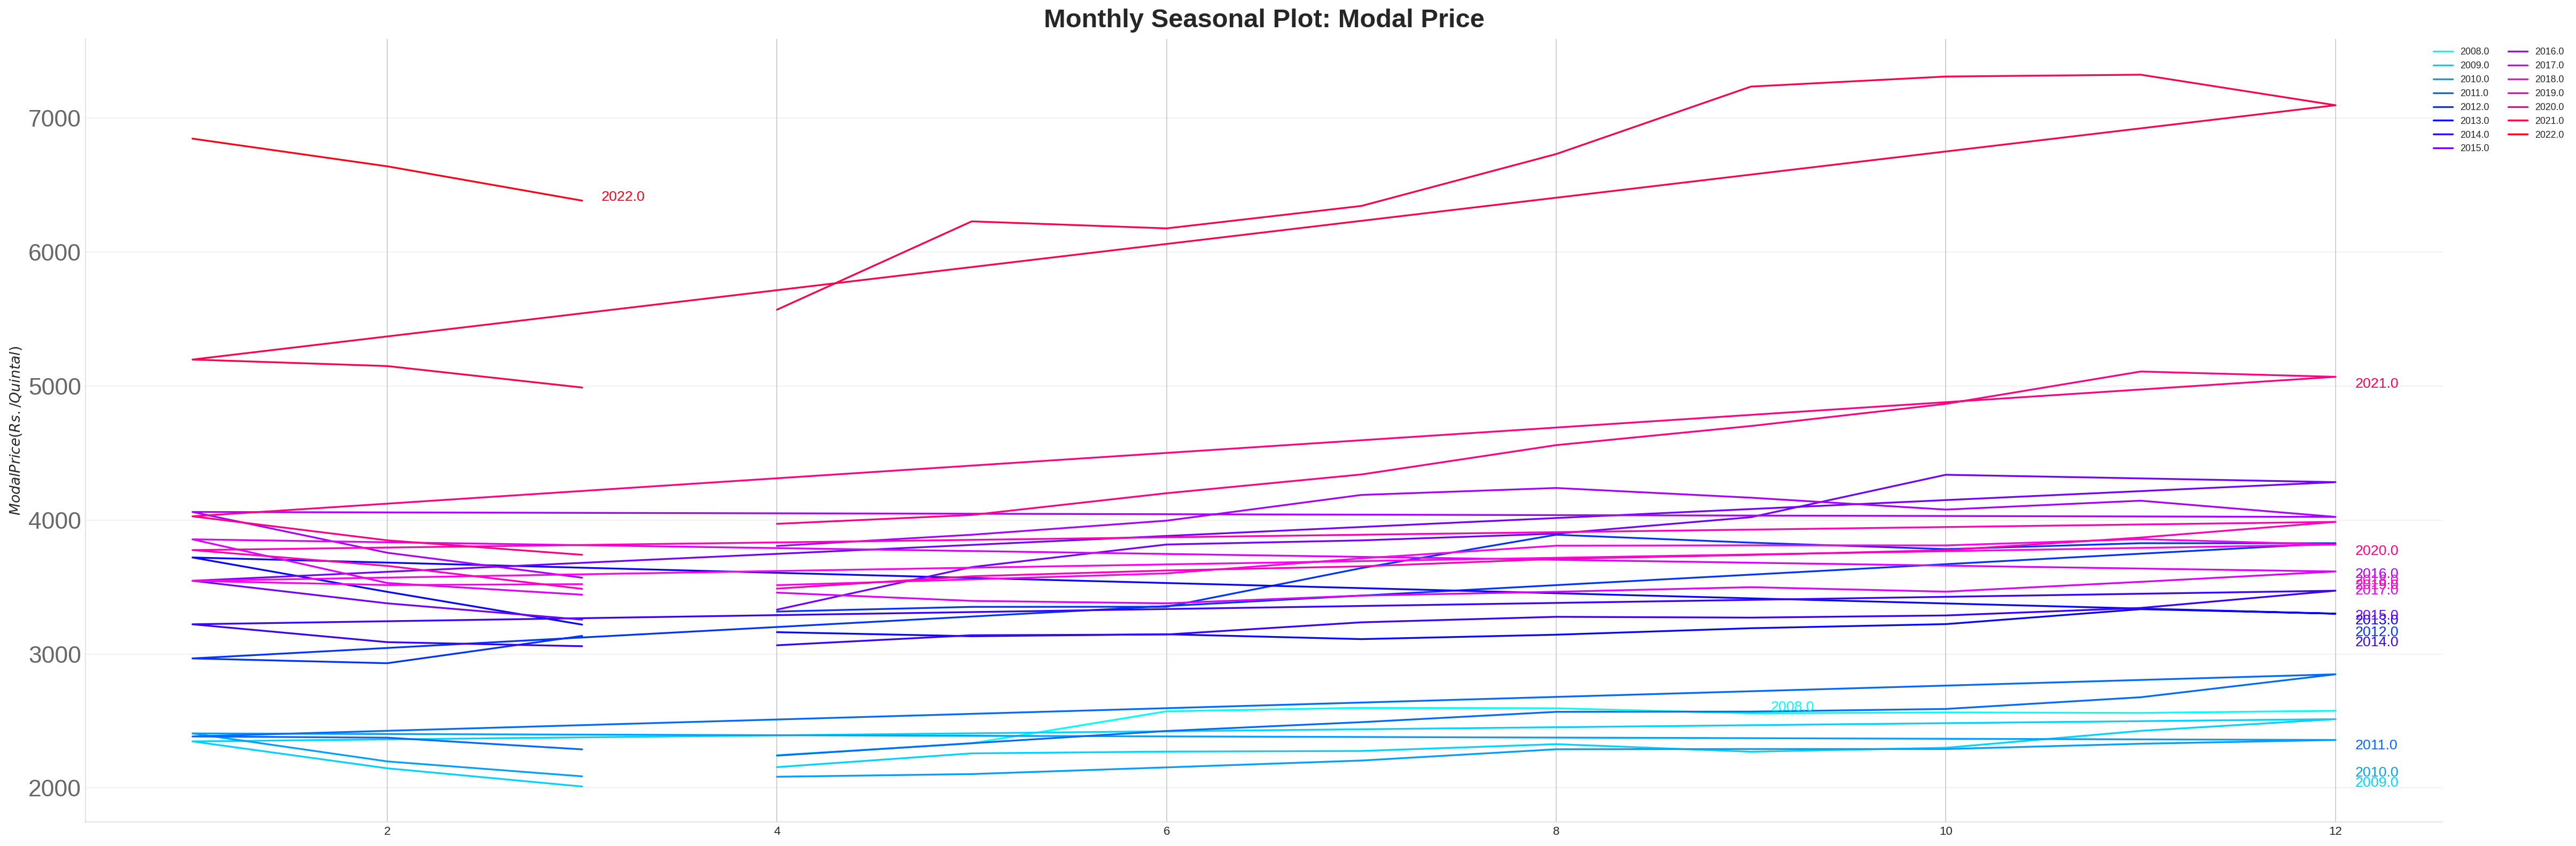

In [49]:

# Draw Plot
#rainbow(np.linspace(0.5, 1, 15))
#hsv(np.linspace(0.5, 1, 15))
mycolors = cm.hsv(np.linspace(0.5, 1, 15))
plt.figure(figsize=(30,10), dpi= 80)

for i, y in enumerate(years):
    plt.plot(
        'Month', 
        'Modal Price (Rs./Quintal)', 
        data = outer_join_df.loc[outer_join_df.Year == y, :], 
        color=mycolors[i], 
        label=y
    )
    plt.text(
        outer_join_df.loc[outer_join_df.Year==y, :].shape[0]+0.1, 
        outer_join_df.loc[outer_join_df.Year==y, 'Modal Price (Rs./Quintal)'][-1:].values[0] + 0.2, 
        y, 
        fontsize=12, 
        color=mycolors[i]
    )

    
# Decoration

plt.ylabel('$Modal Price (Rs./Quintal)$')
plt.yticks(fontsize=20, alpha=.7)
plt.title("Monthly Seasonal Plot: Modal Price", fontsize=22)
plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
plt.legend(loc=0, 
           ncol=2, 
           fontsize=8,
          bbox_to_anchor=(0.555, 0.5, 0.5, 0.5))
plt.show()